In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

In [3]:
file_path = '/workspaces/STdata_prediction/src/ST-graph/input/graph_sensor_locations.csv'

In [4]:
data = pd.read_csv(file_path)
indexes = data['index']
sensor_ids = data['sensor_id']
latitudes = data['latitude']
longitudes = data['longitude']

In [5]:
# データを用いた処理の例
# 例えば、経度と緯度を使って距離行列を計算する場合
def euclidean_distance(lat1, lon1, lat2, lon2):
    return ((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2) ** 0.5

num_sensors = len(indexes)
distance_matrix = np.zeros((num_sensors, num_sensors))

for i in range(num_sensors):
    for j in range(num_sensors):
        if i != j:
            distance_matrix[i, j] = euclidean_distance(latitudes[i], longitudes[i], latitudes[j], longitudes[j])

print(distance_matrix)

[[0.         0.08916517 0.08889816 ... 0.16189761 0.05638761 0.05235642]
 [0.08916517 0.         0.00028284 ... 0.24681549 0.1410134  0.08063348]
 [0.08889816 0.00028284 0.         ... 0.24657967 0.14076997 0.08047038]
 ...
 [0.16189761 0.24681549 0.24657967 ... 0.         0.10622858 0.17410085]
 [0.05638761 0.1410134  0.14076997 ... 0.10622858 0.         0.0750462 ]
 [0.05235642 0.08063348 0.08047038 ... 0.17410085 0.0750462  0.        ]]


In [6]:
# Find the index of the smallest distance (excluding the diagonal)
min_distance = np.inf
min_index = (None, None)

for i in range(num_sensors):
    for j in range(i + 1, num_sensors):  # Start from i+1 to avoid the diagonal
        if distance_matrix[i, j] < min_distance:
            min_distance = distance_matrix[i, j]
            min_index = (i, j)

print(f"The smallest distance is between indexes {min_index[0]} and {min_index[1]} with a distance of {min_distance}")

The smallest distance is between indexes 191 and 192 with a distance of 0.0001523154621152438


In [7]:
# ファイルのパス
file_path = '/workspaces/STdata_prediction/src/LGnet/input/metr-la.h5'

# .h5ファイルの読み取り専用モードでの読み込み
with h5py.File(file_path, 'r') as f:
    # データセットのリストを取得
    dataset_list = list(f.keys())
    print("Available datasets:", dataset_list)

    # dfグループ内のデータセットを取得
    df_group = f['df']
    print(f"\nGroups and datasets in 'df': {list(df_group.keys())}\n")

    # 各データセットの内容を表示
    for key in df_group.keys():
        data = df_group[key][:]
        print(f"Dataset: {key}")
        print(data.shape)
        print("\n")

Available datasets: ['df']

Groups and datasets in 'df': ['axis0', 'axis1', 'block0_items', 'block0_values']

Dataset: axis0
(207,)


Dataset: axis1
(34272,)


Dataset: block0_items
(207,)


Dataset: block0_values
(34272, 207)




In [8]:
with h5py.File(file_path, 'r') as f:
    # dfグループ内のデータセットを取得
    df_group = f['df']

    # 各データセットを取得
    axis0 = df_group['axis0'][:]
    axis1 = df_group['axis1'][:]
    block0_items = df_group['block0_items'][:]
    block0_values = df_group['block0_values'][:]

    # DataFrameの作成
    df = pd.DataFrame(block0_values, index=axis1, columns=block0_items)

# DataFrameの表示
print(df.head())

                     b'773869'  b'767541'  b'767542'  b'717447'  b'717446'  \
1330560000000000000  64.375000  67.625000  67.125000  61.500000  66.875000   
1330560300000000000  62.666667  68.555556  65.444444  62.444444  64.444444   
1330560600000000000  64.000000  63.750000  60.000000  59.000000  66.500000   
1330560900000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1330561200000000000   0.000000   0.000000   0.000000   0.000000   0.000000   

                     b'717445'  b'773062'  b'767620'  b'737529'  b'717816'  \
1330560000000000000  68.750000     65.125     67.125  59.625000  62.750000   
1330560300000000000  68.111111     65.000     65.000  57.444444  63.333333   
1330560600000000000  66.250000     64.500     64.250  63.875000  65.375000   
1330560900000000000   0.000000      0.000      0.000   0.000000   0.000000   
1330561200000000000   0.000000      0.000      0.000   0.000000   0.000000   

                     ...  b'772167'  b'769372'  b'774204'  b'7

In [9]:
def plot_graph(speed_values, start_index, end_index):
    plt.figure(figsize=(12, 8))
    indices = np.arange(speed_values.shape[0])
    colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用

    for i, idx in enumerate(range(start_index, end_index + 1)):
        if idx < speed_values.shape[1]:  # Ensure the index is within bounds
            values_index = speed_values.iloc[:, idx].values
            plt.plot(indices, values_index, linestyle='-', label=f'Values at Index {idx}', 
                     color=colors(i), alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Values from Index {start_index} to {end_index}')
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 100)
    plt.show()


/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/tmp/ipykernel_119398/2638802387.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用


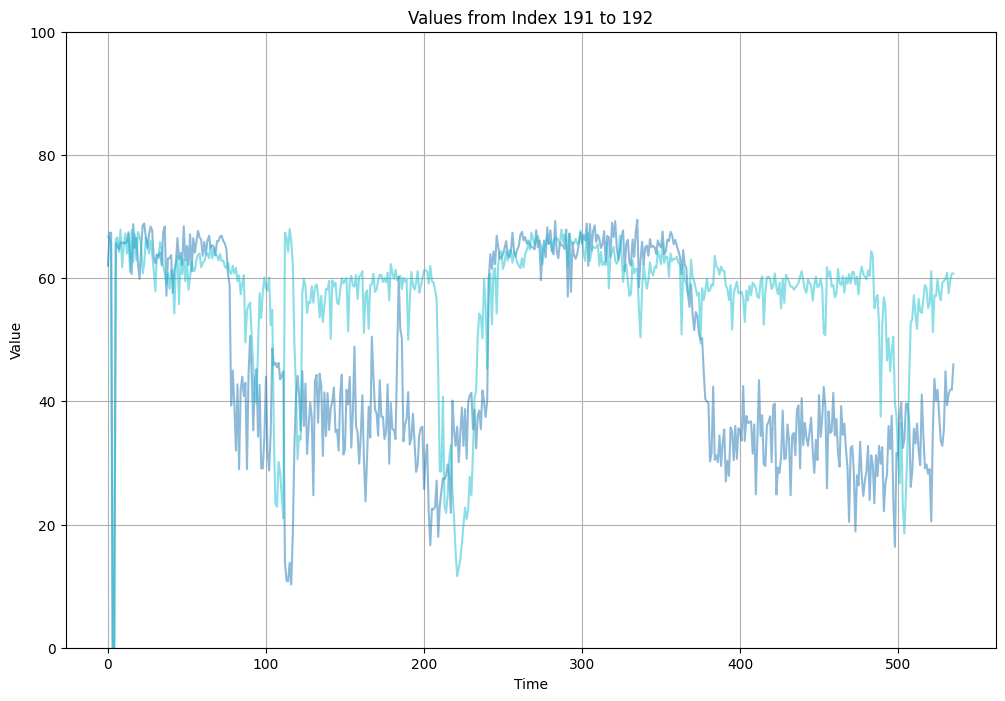

In [10]:
plot_graph(np.array_split(df, 64)[0], 191, 192)

In [11]:
from scipy.cluster.hierarchy import linkage, fcluster

# クラスタリングの実行
# 'ward'法はクラスタ間の分散が最小となるようにクラスタを結合する方法です
Z = linkage(distance_matrix, method='ward')

# クラスタ数を決定 (例: 2クラスタ)
num_clusters = 25
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# クラスタリング結果の表示
for i in range(num_clusters):
    cluster_indices = np.where(clusters == i + 1)[0]
    print(f"Cluster {i + 1}: {cluster_indices}")


Cluster 1: [60 63 75 76 81 82]
Cluster 2: [ 47  52  69  90  99 137 149]
Cluster 3: [150 180 181]
Cluster 4: [  9  26  41  43  77  84  88  89 104 130 131 146 158 197 204]
Cluster 5: [ 86  87 100 148 172]
Cluster 6: [  8  14  34  59 151 182 185 186]
Cluster 7: [ 23 124 165 174]
Cluster 8: [  6  33  38  91  93 136 138 144]
Cluster 9: [ 16  29  30  48  64  65 134 166 170 196]
Cluster 10: [  1   2  49  56  78 101 123 133 135 183 184]
Cluster 11: [  3   4   5  12  15  17  80 191 192 193]
Cluster 12: [  7  11  27  28  55  79  85  92 105 106 107 108 110 132 152 153 171 173
 177 178 179 201 202]
Cluster 13: [ 44  45 203]
Cluster 14: [ 18  21  35  50 200]
Cluster 15: [ 46  66 121 126 189]
Cluster 16: [ 22  36  39  57  67  68  74  98 102 103 117 118 119 140 175 199]
Cluster 17: [ 40  61  70  71  72 190 205]
Cluster 18: [ 10  31  73  83 113 122 141 156 164 176]
Cluster 19: [157 159 160 161 162 163 187 188 195]
Cluster 20: [19 20 32 94]
Cluster 21: [ 96  97 127 128 154 155 198 206]
Cluster 22: [ 13

/tmp/ipykernel_119398/1809888641.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


In [12]:
def plot_graphs_by_cluster(speed_values, clusters, num_clusters):
    indices = np.arange(speed_values.shape[0])
    colors = plt.cm.get_cmap('tab10', speed_values.shape[1])  # カラーマップを使用

    for cluster in range(1, num_clusters + 1):
        plt.figure(figsize=(12, 8))
        cluster_indices = np.where(clusters == cluster)[0]
        
        for idx in cluster_indices:
            values_index = speed_values.iloc[:, idx].values
            plt.plot(indices, values_index, linestyle='-', 
                     label=f'Index {idx}', 
                     color=colors(idx), alpha=0.5)

        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title(f'Cluster {cluster} Values')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 100)
        plt.show()

/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/tmp/ipykernel_119398/889443620.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', speed_values.shape[1])  # カラーマップを使用


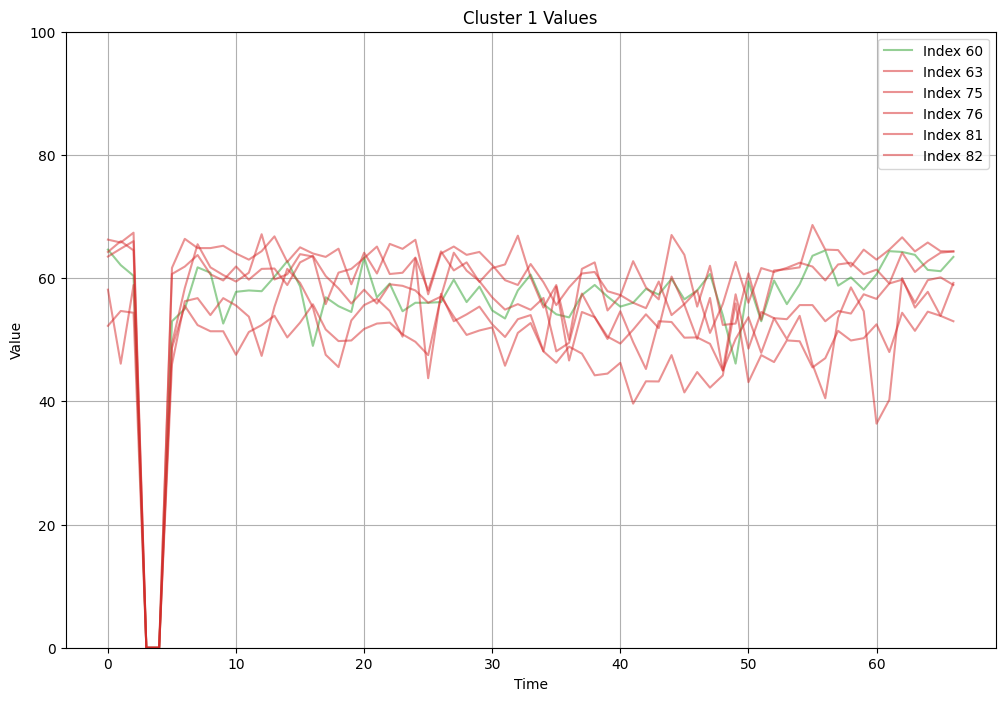

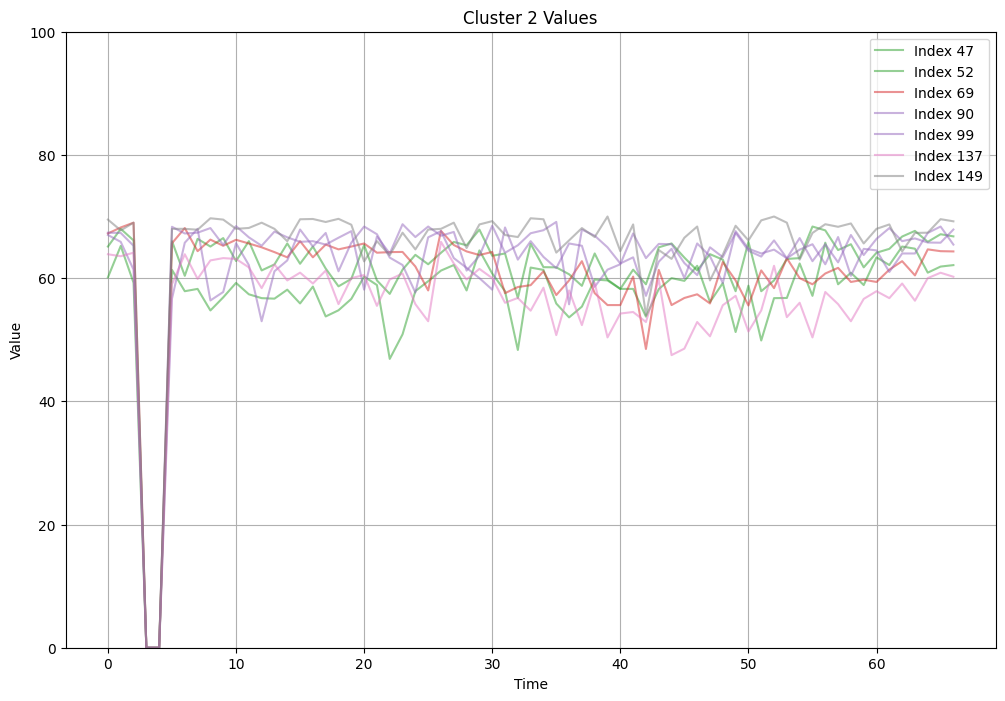

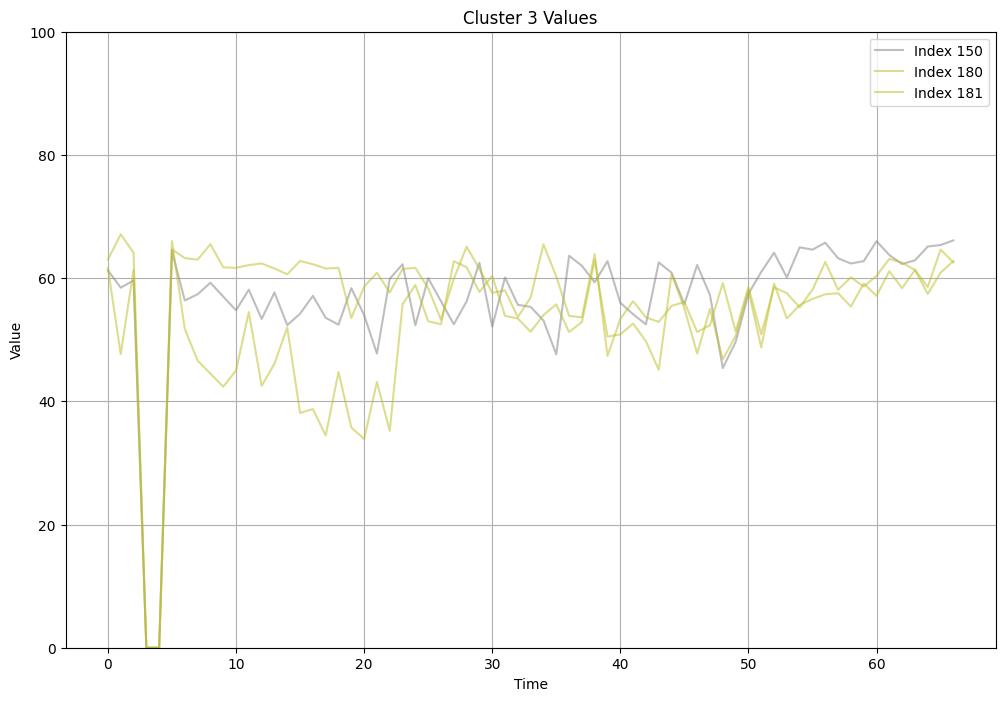

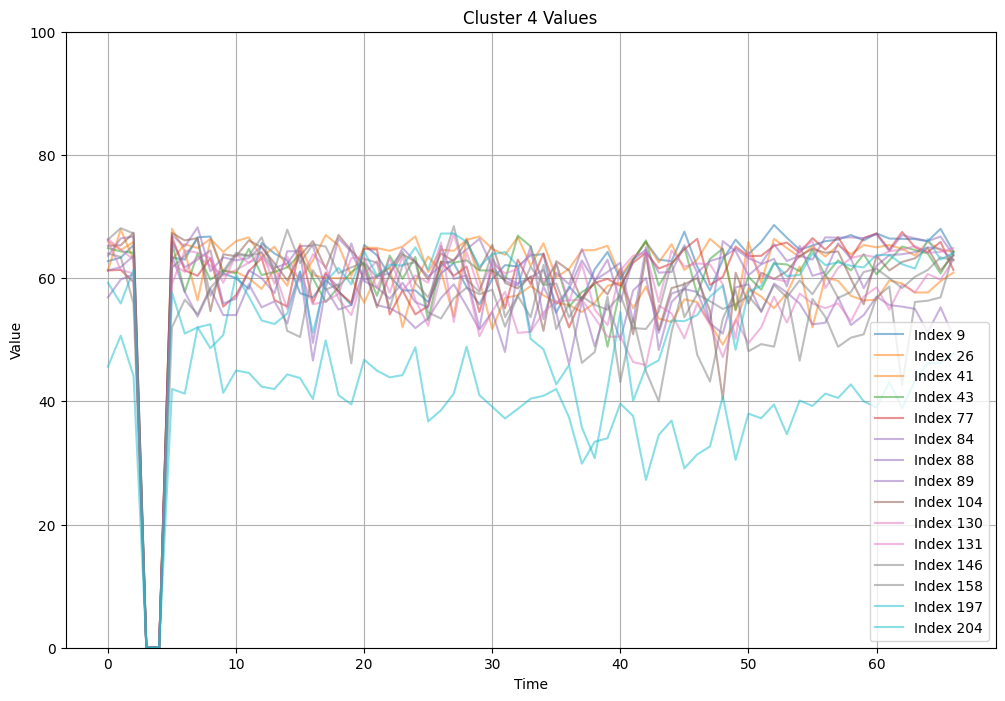

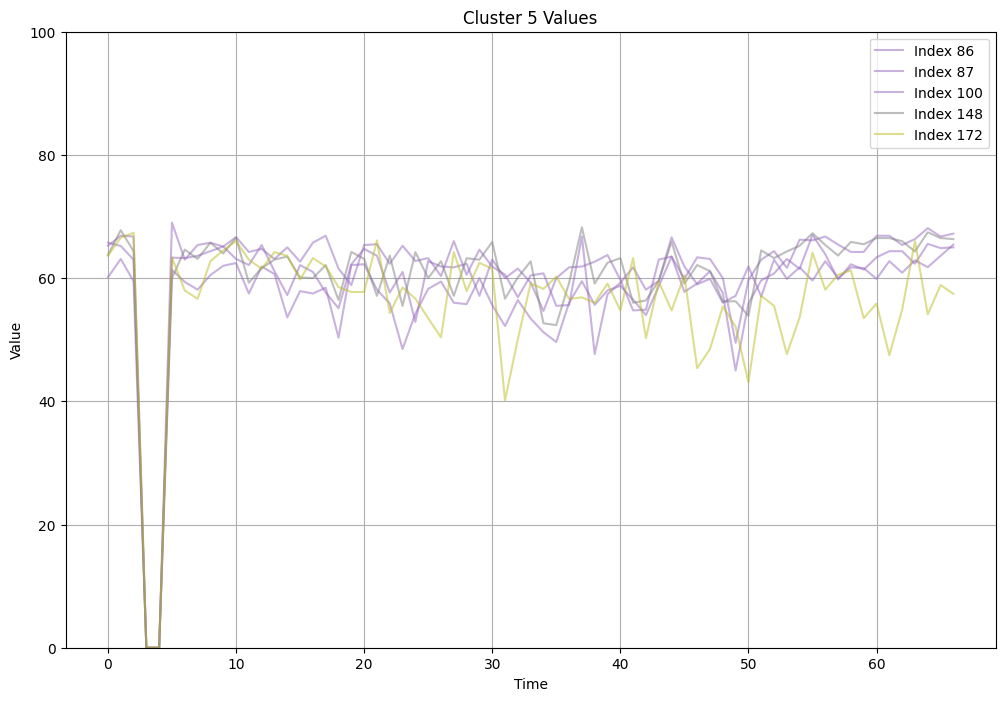

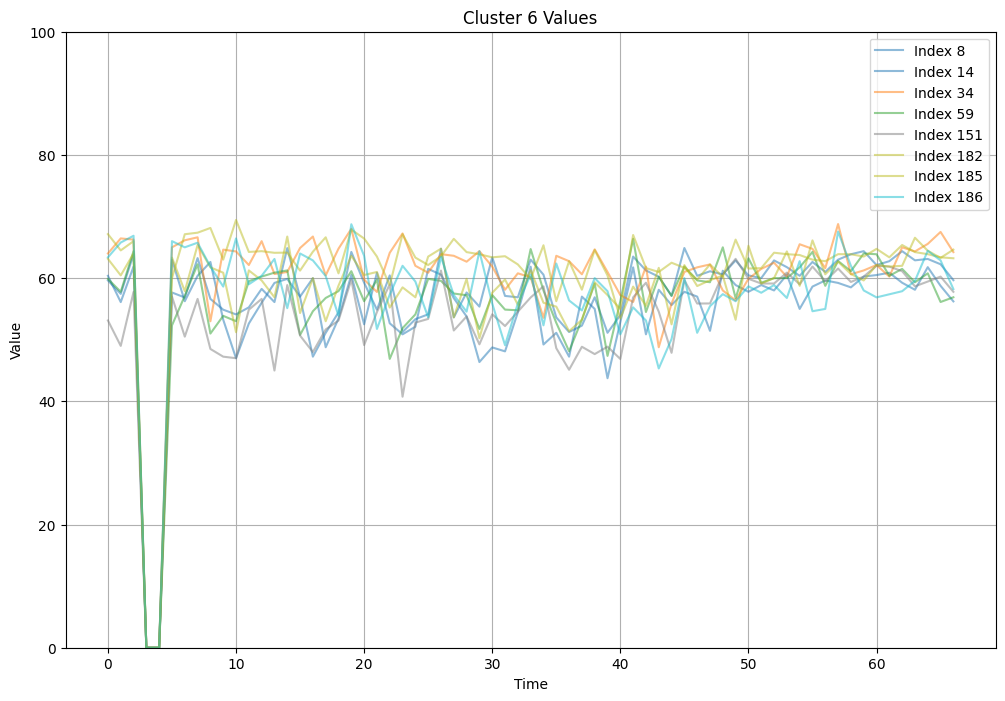

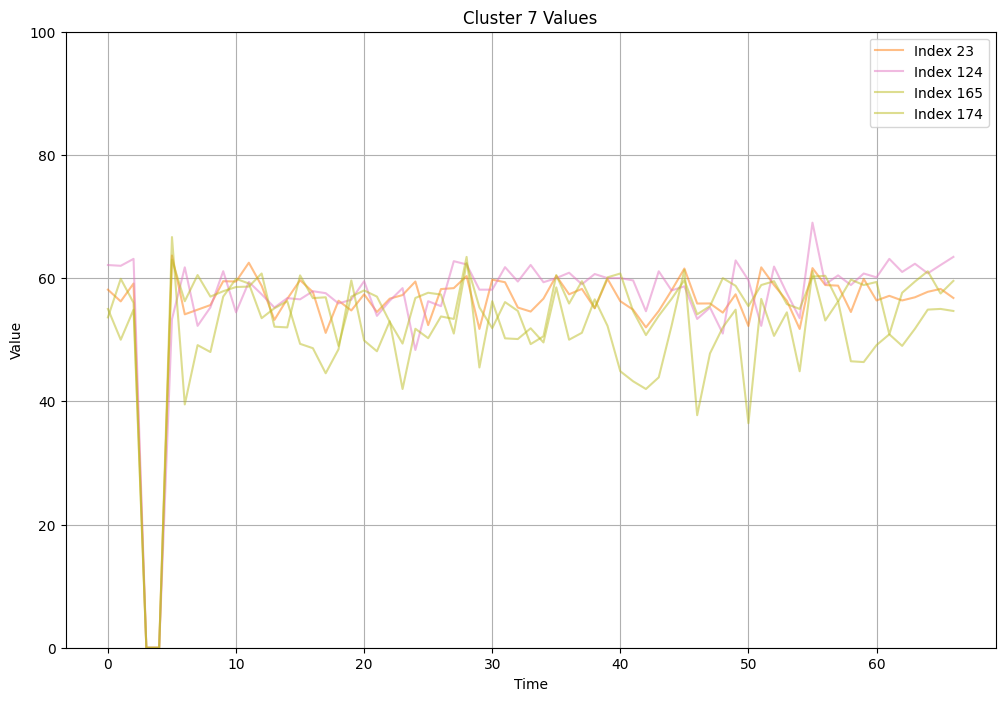

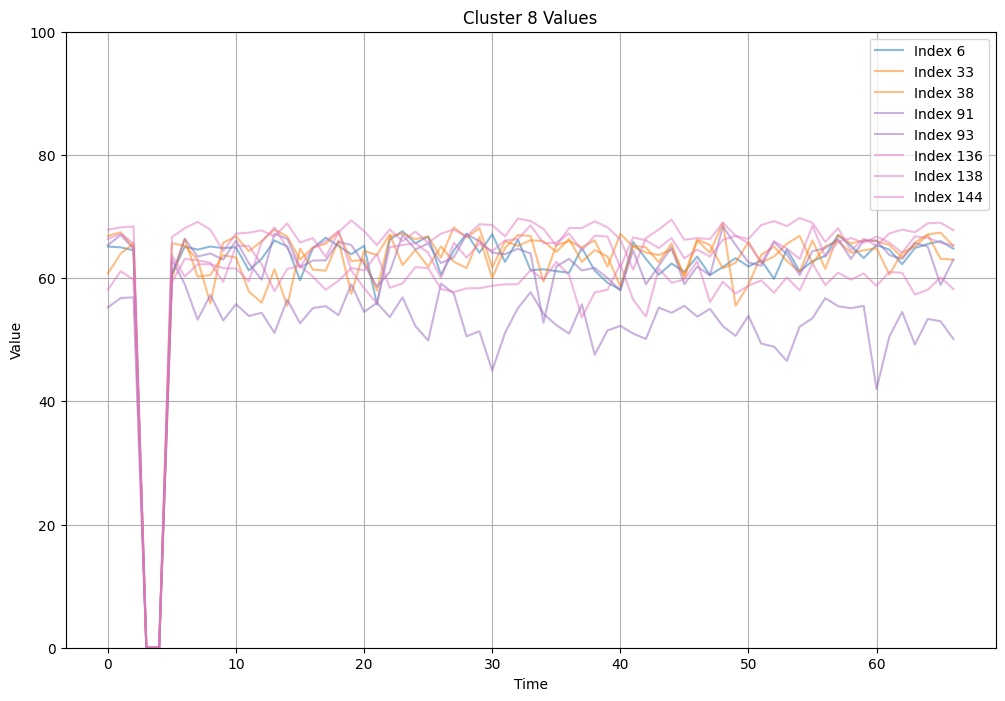

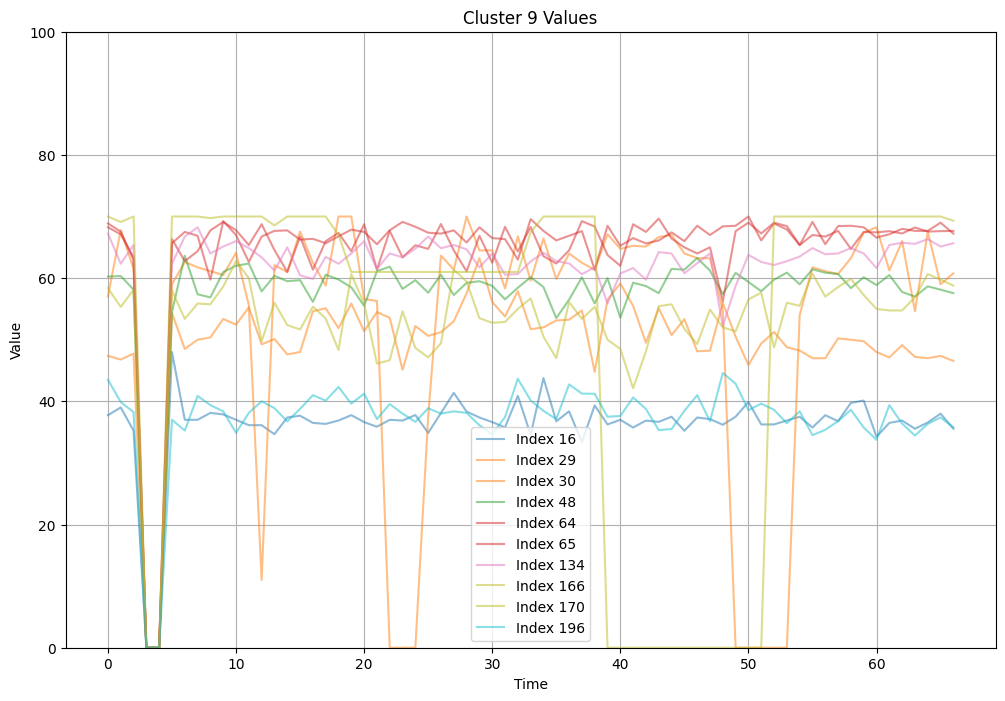

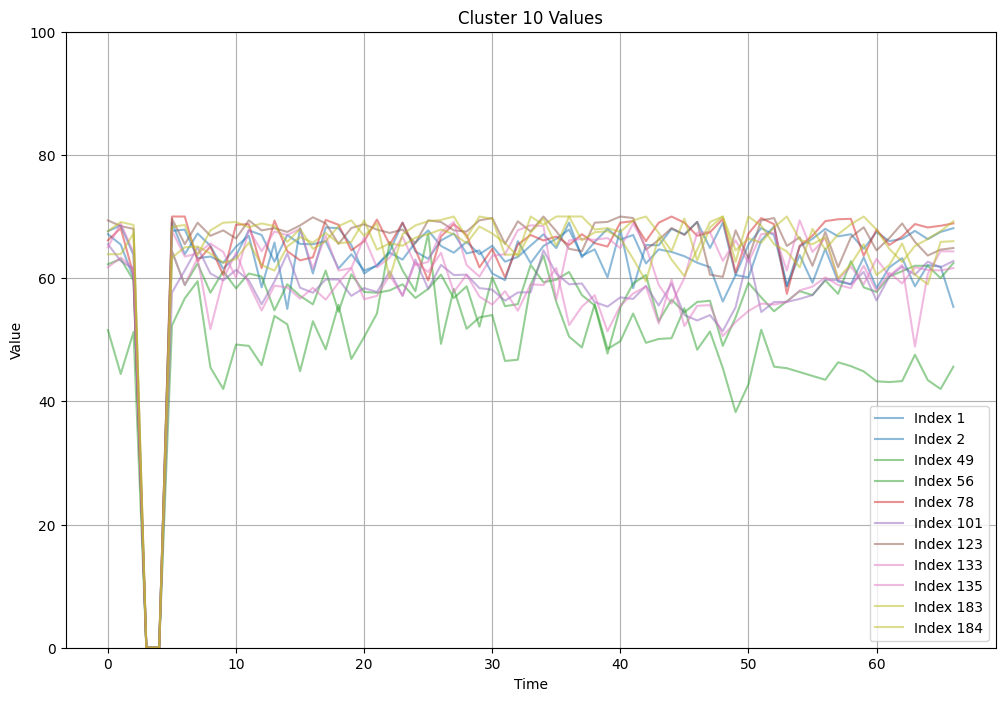

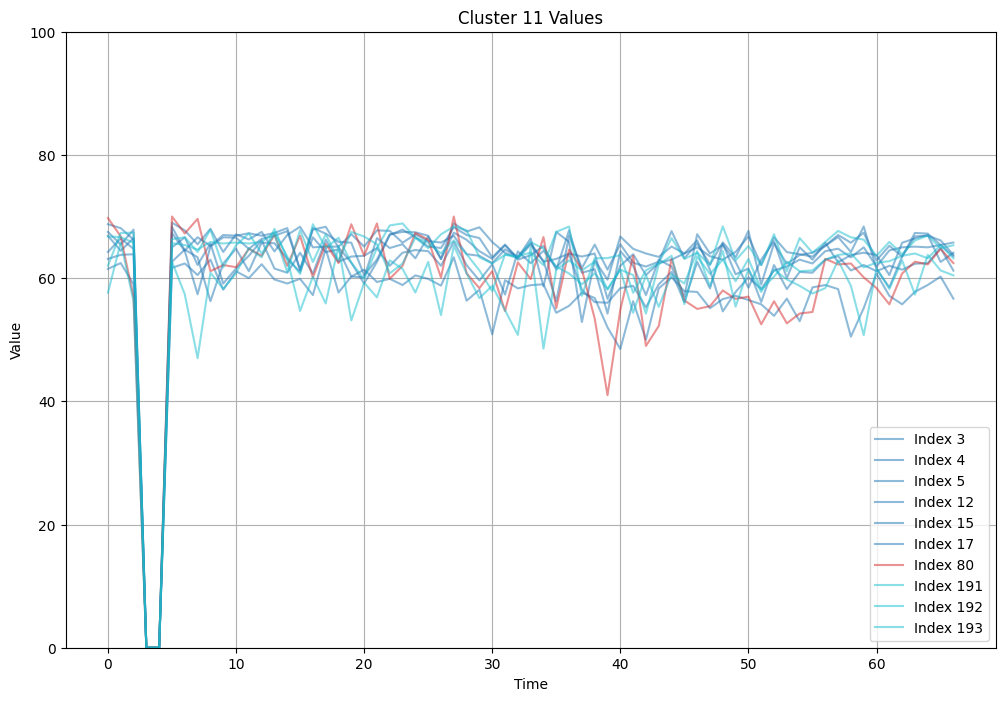

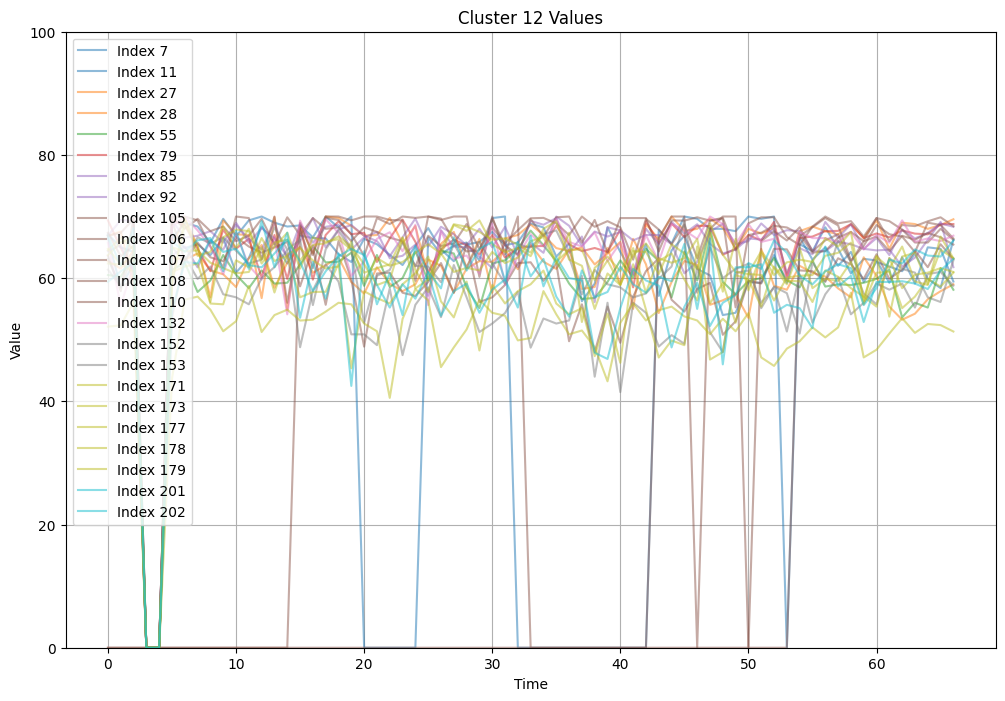

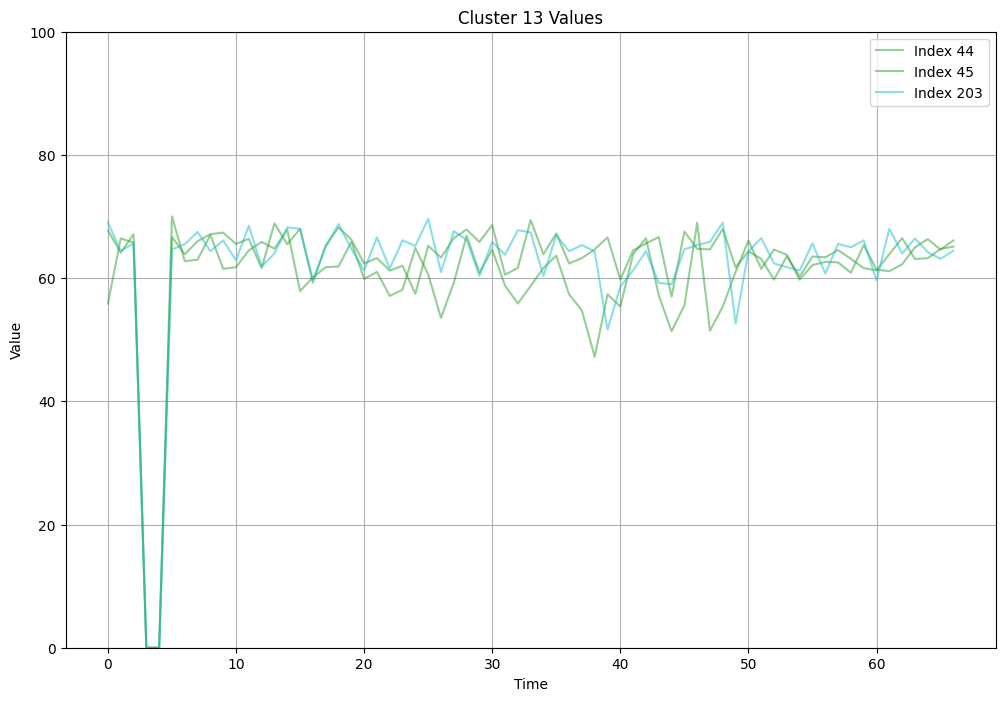

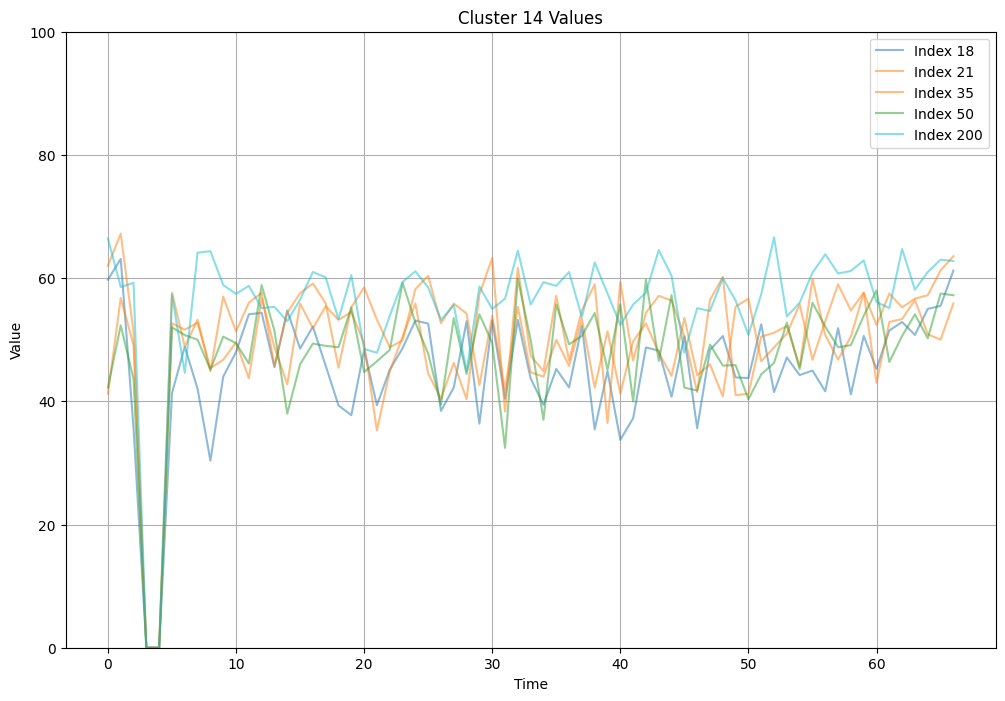

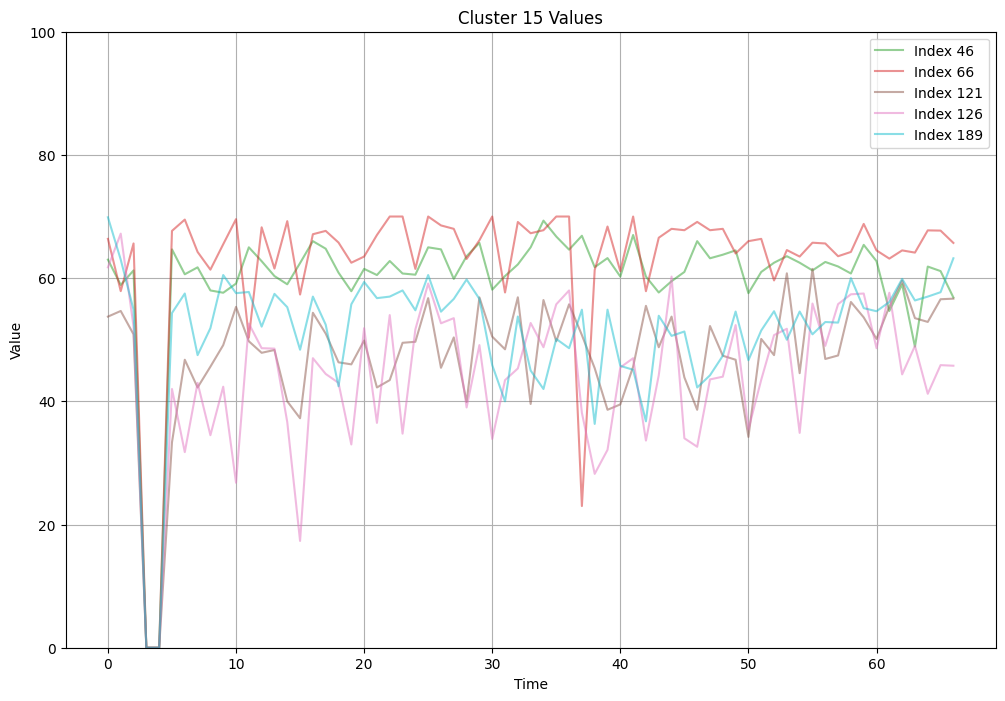

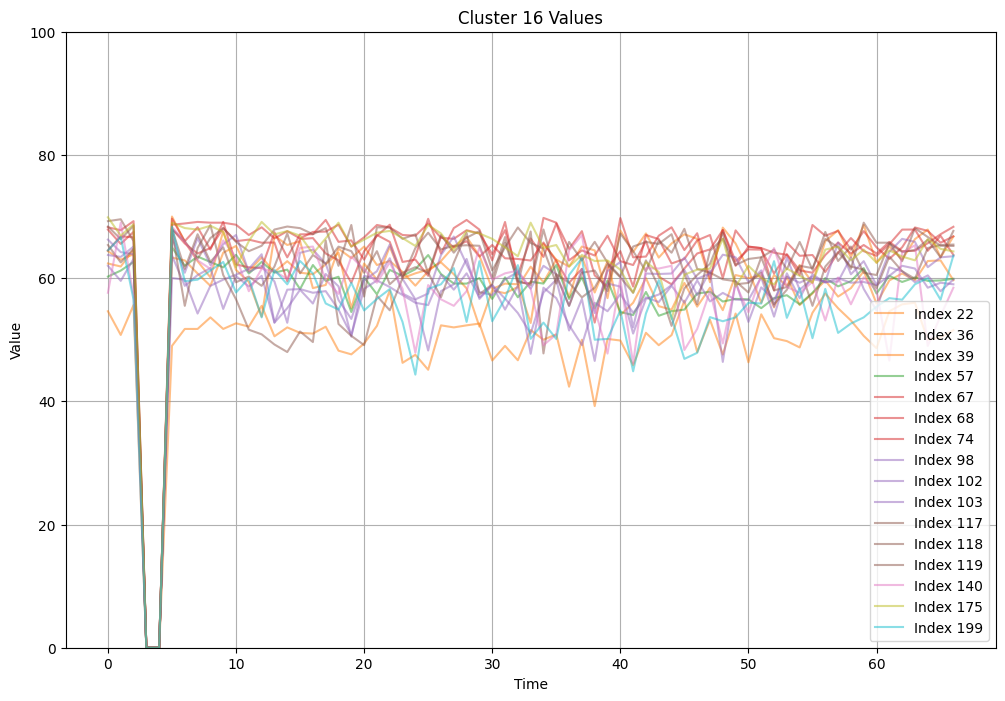

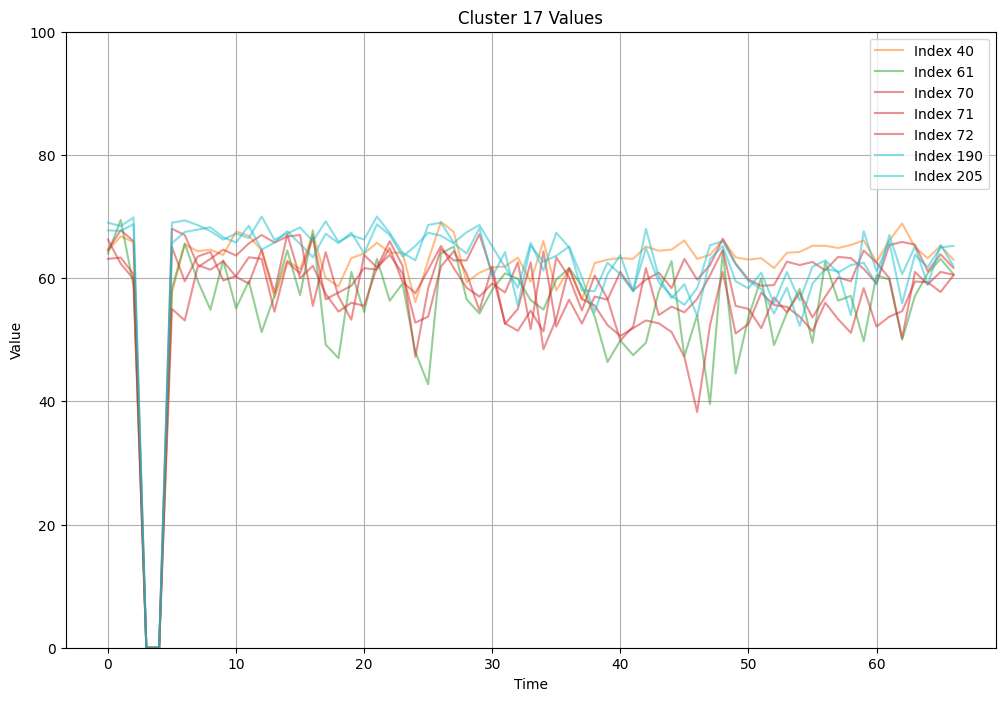

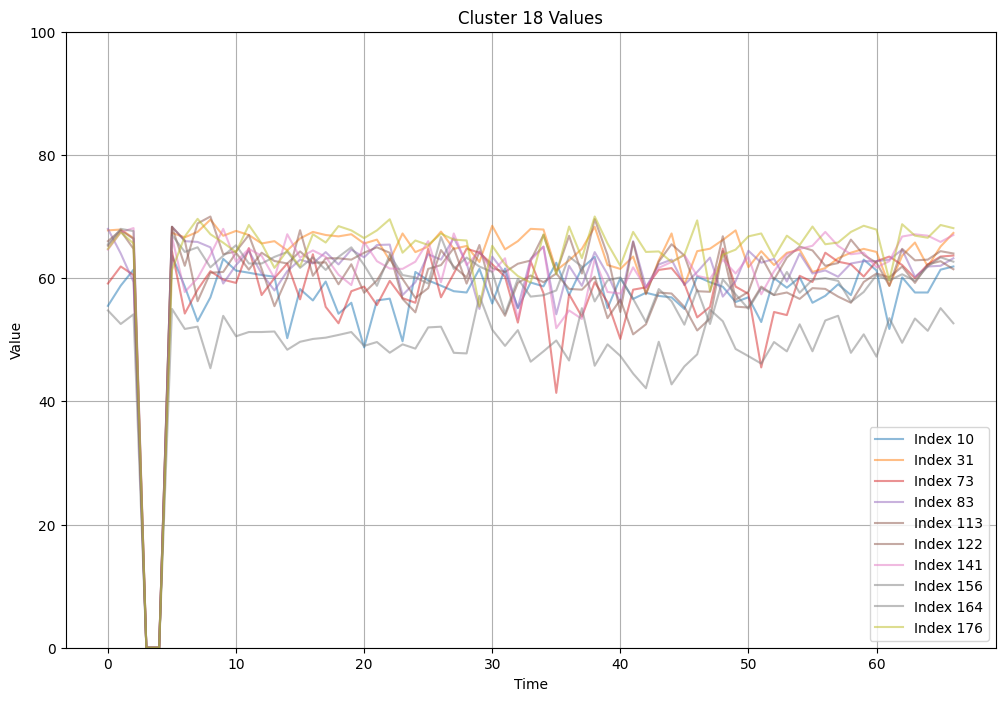

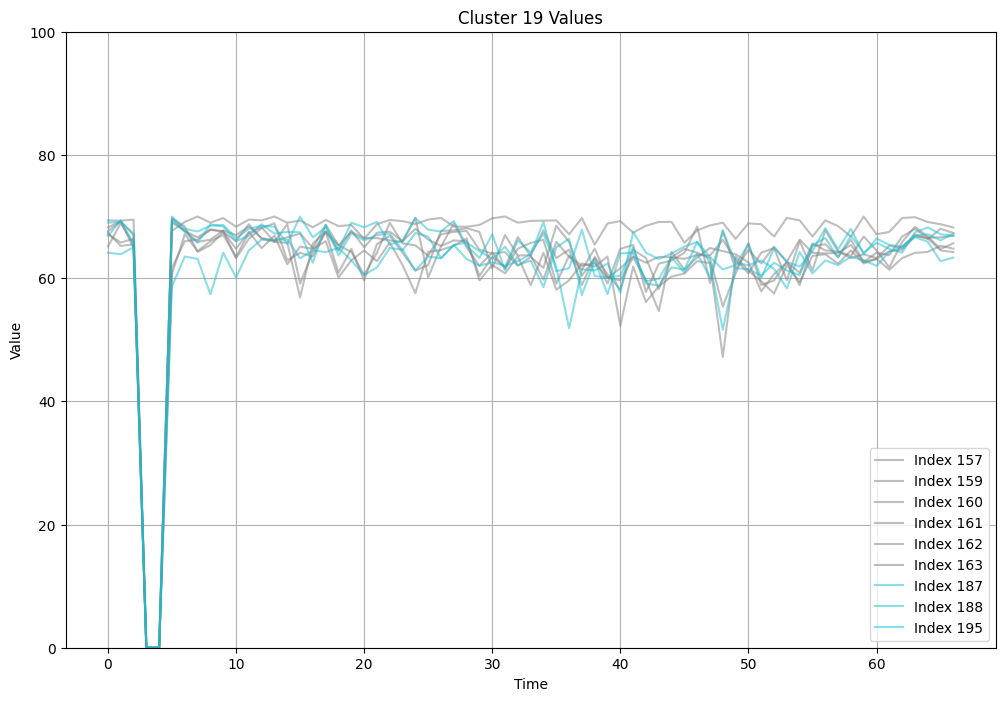

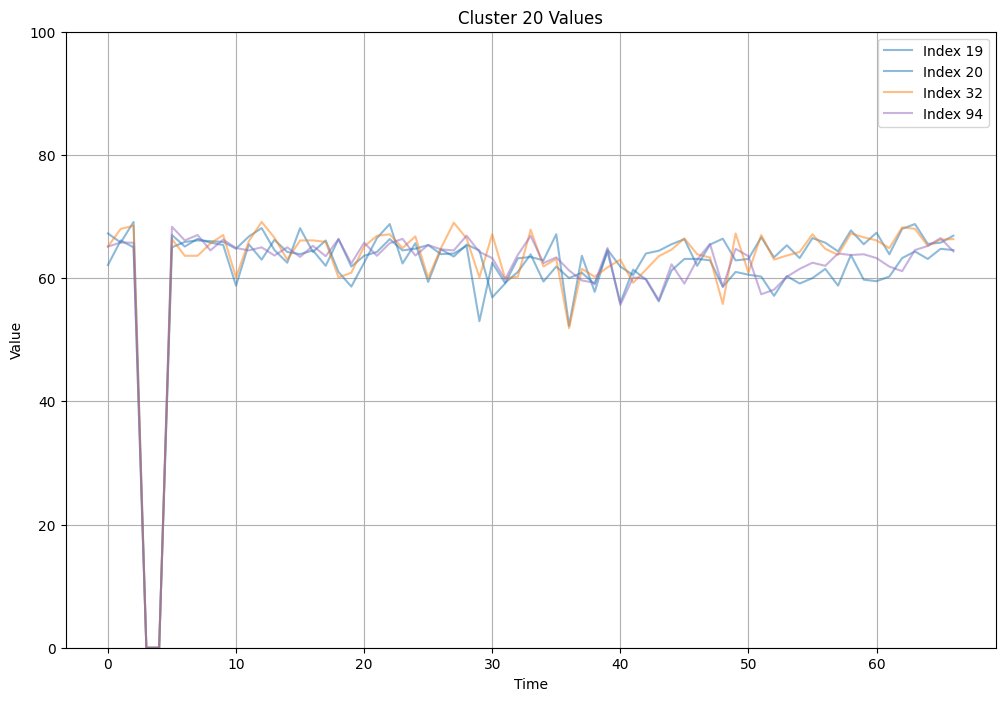

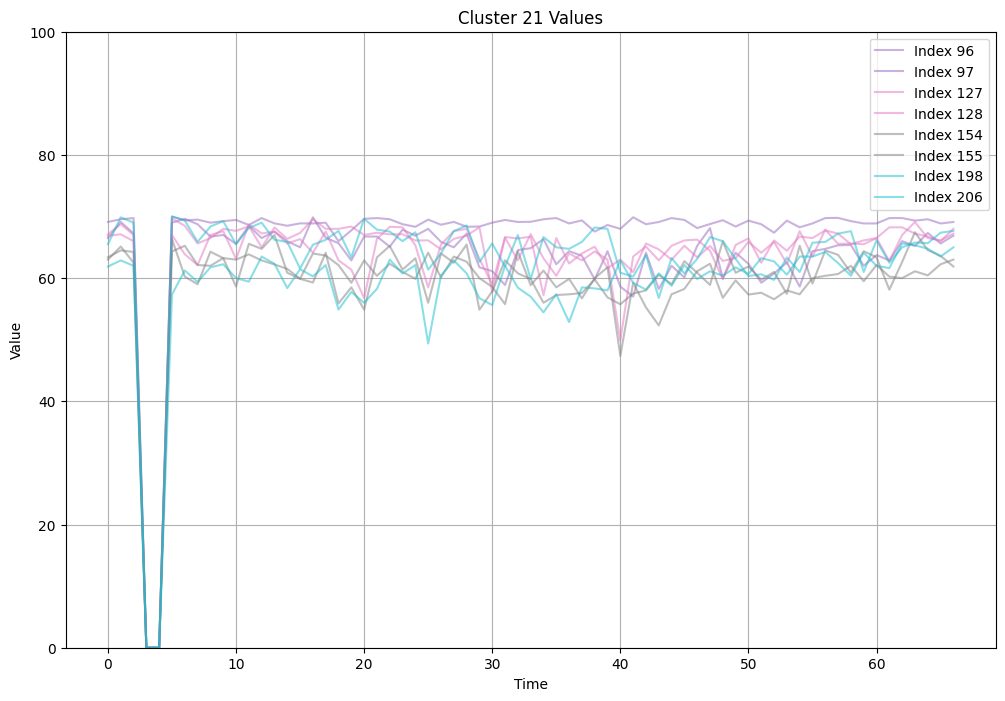

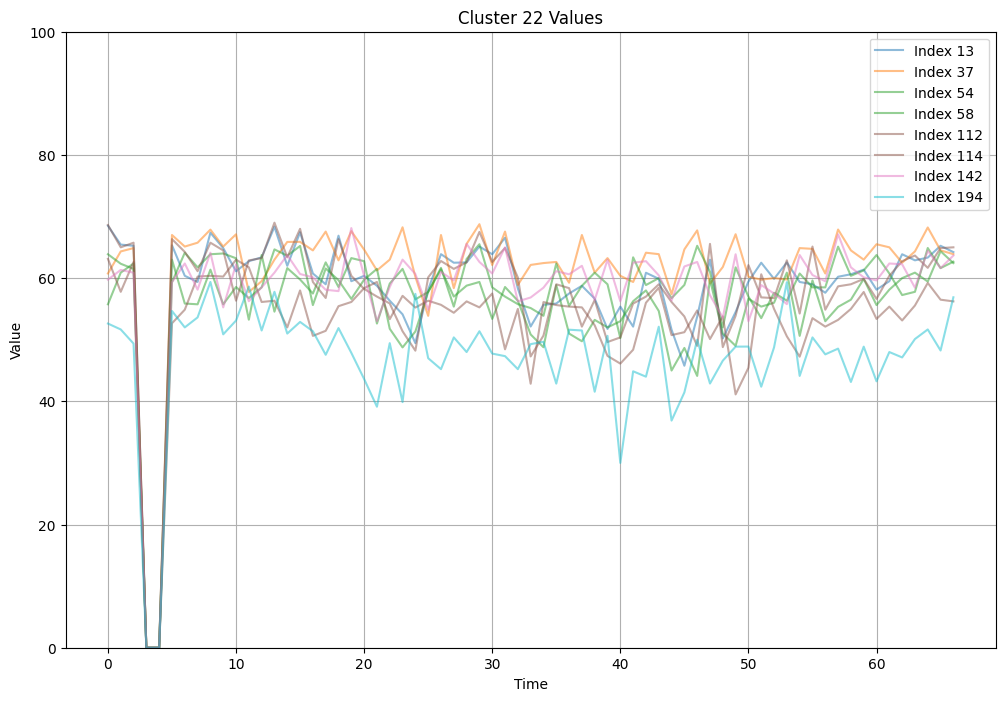

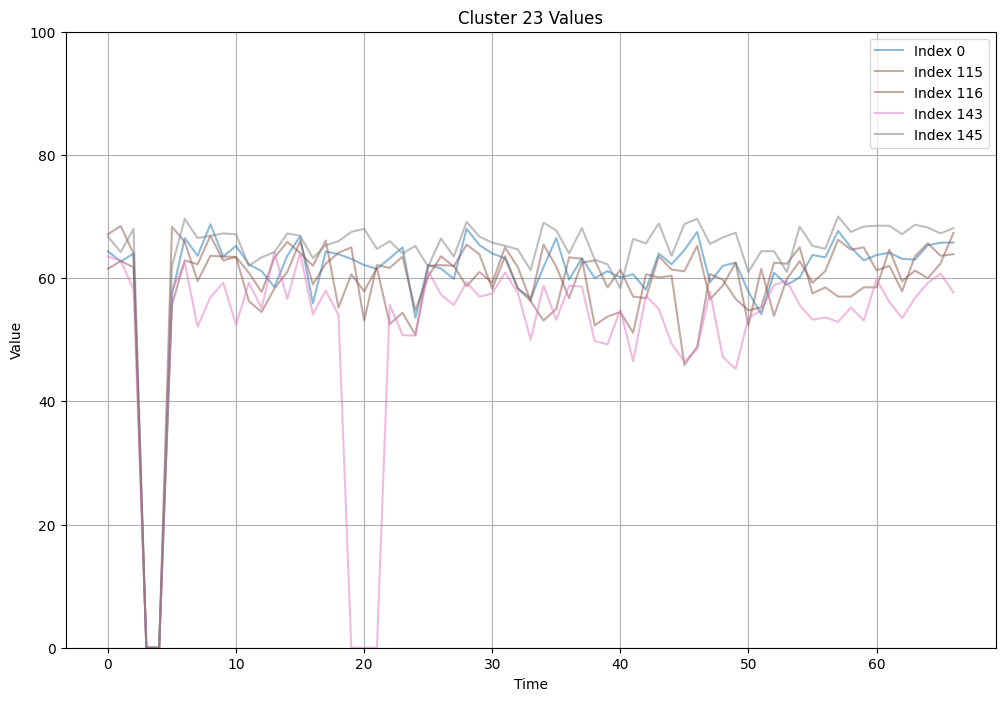

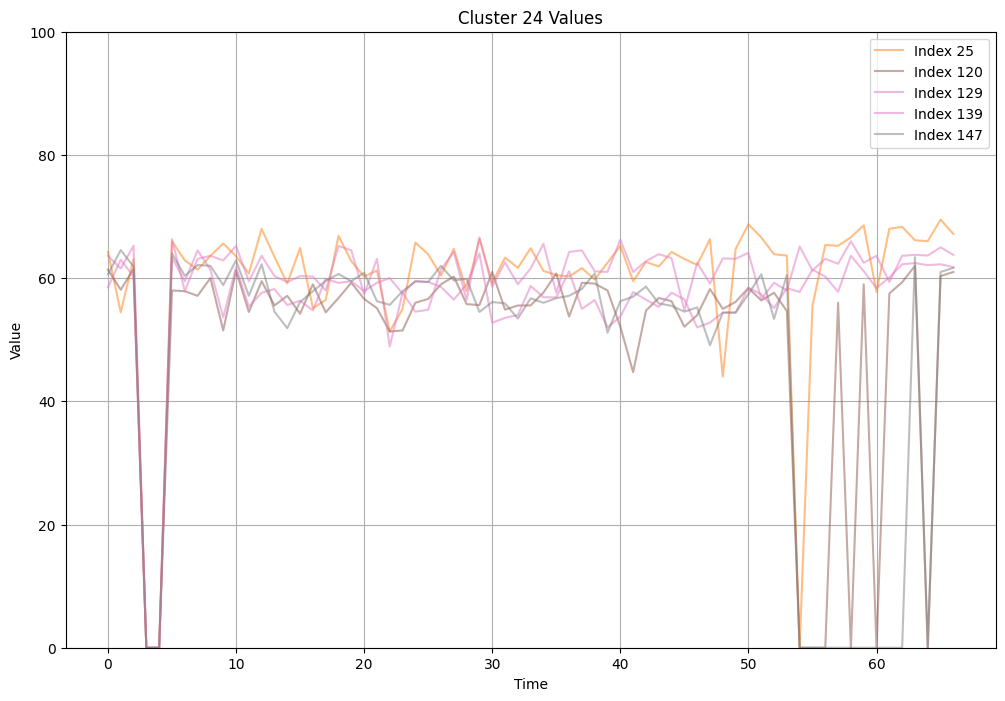

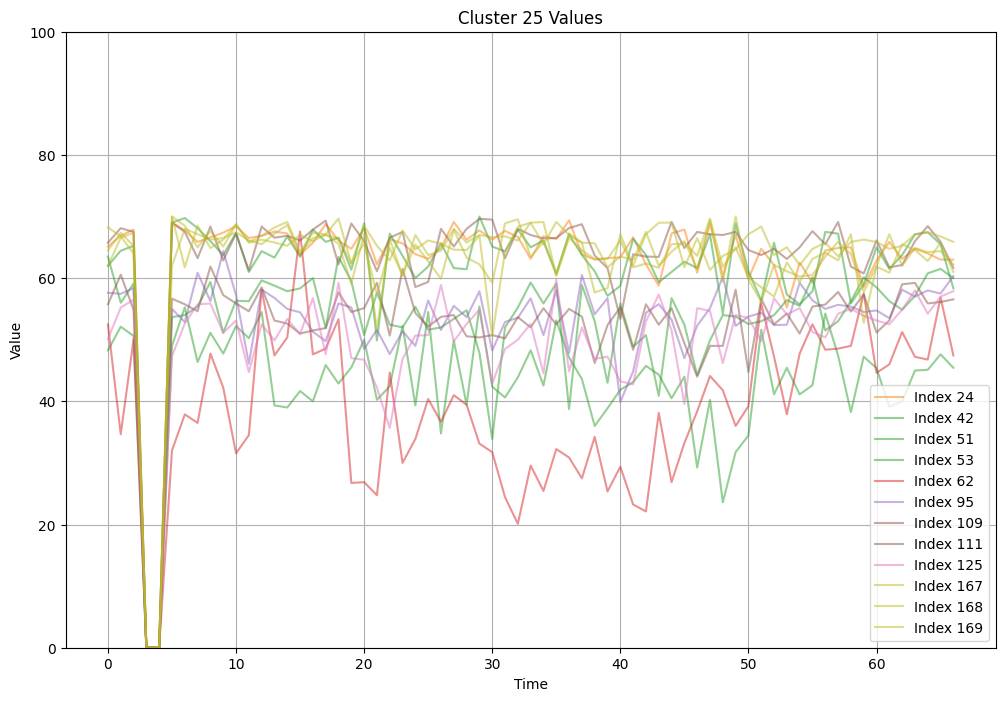

In [29]:
plot_graphs_by_cluster(np.array_split(df, 512)[0], clusters, num_clusters)

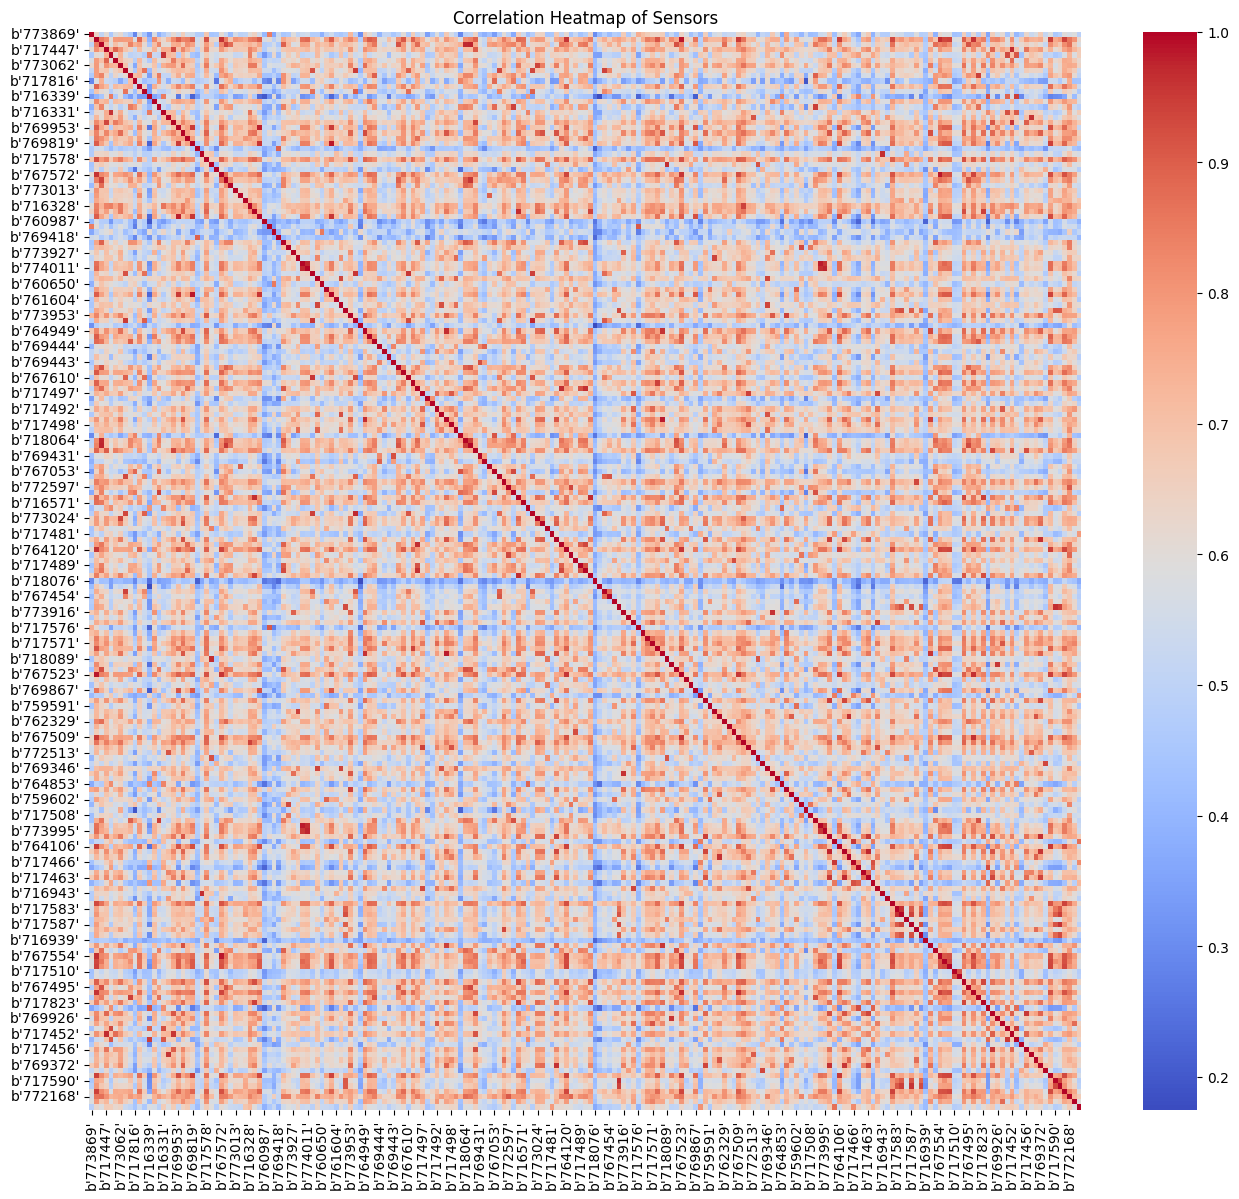

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# センサー毎の相関行列を計算
correlation_matrix = df.corr(method='pearson')

# ヒートマップを描画
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Sensors')
plt.show()

/tmp/ipykernel_119398/2357437888.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(indexes))


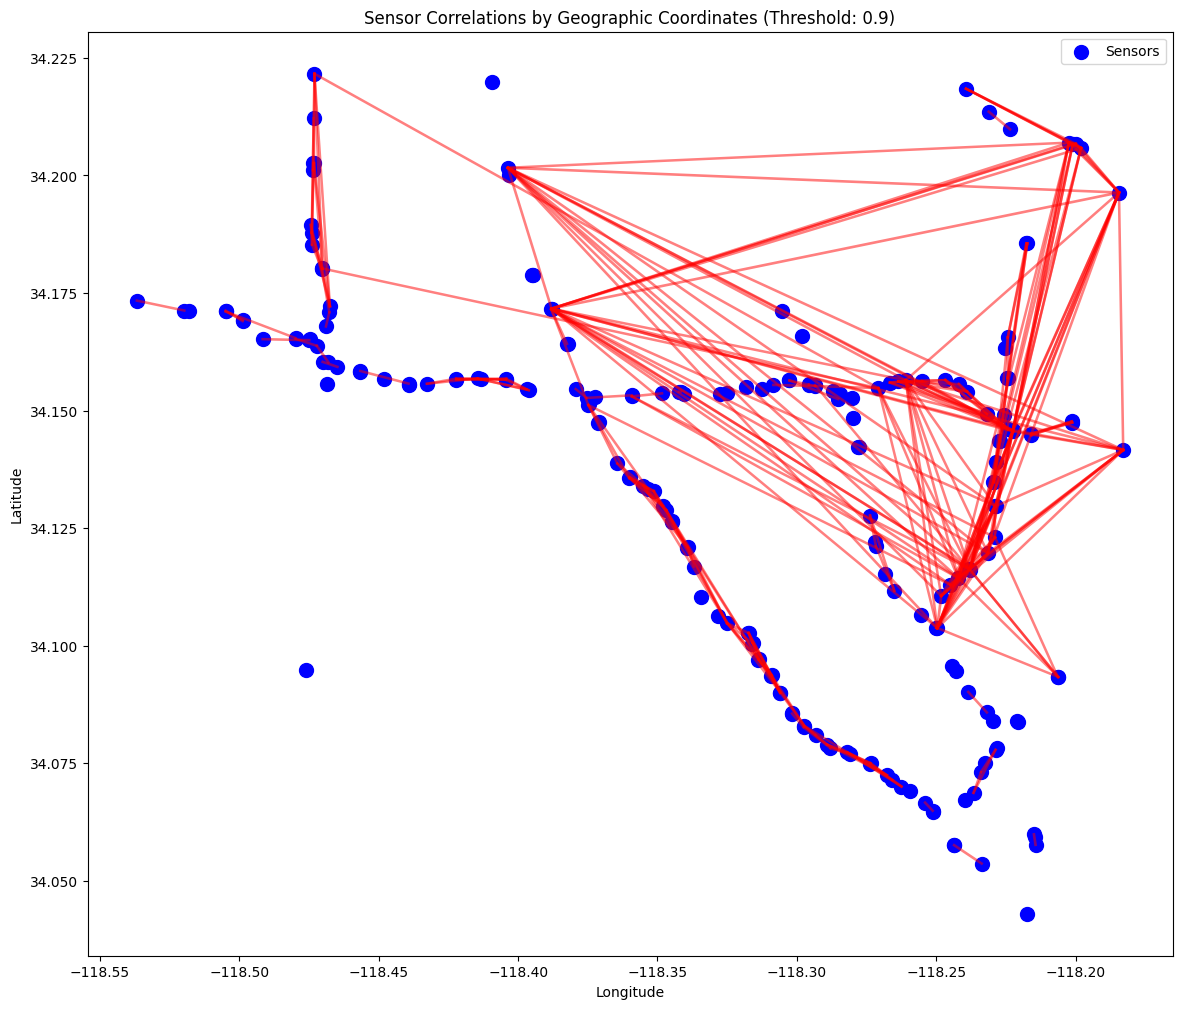

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# センサーの時系列データ (例: センサーごとの測定値を含む列が存在する)

# 閾値を設定して、強い相関のみを可視化（例：|0.7|以上の相関を可視化）
threshold = 0.9
strong_correlations = np.abs(correlation_matrix) > threshold

# 各センサーに対して一意の色を割り当てる
colors = plt.cm.get_cmap('hsv', len(indexes))

# プロットの準備
plt.figure(figsize=(14, 12))

# センサーの位置をプロット
plt.scatter(longitudes, latitudes, s=100, c='blue', label='Sensors')

# 相関が強いセンサー間に線を描画
for i in range(len(indexes)):
    for j in range(i+1, len(indexes)):
        if strong_correlations.iloc[i, j]:
            x_coords = [longitudes.iloc[i], longitudes.iloc[j]]
            y_coords = [latitudes.iloc[i], latitudes.iloc[j]]
            plt.plot(x_coords, y_coords, 'r-', alpha=0.5, lw=2 * correlation_matrix.iloc[i, j])

plt.title(f'Sensor Correlations by Geographic Coordinates (Threshold: {threshold})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [16]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.fft import fft
from sklearn.metrics import pairwise_distances
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import geopy.distance


In [17]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    緯度・経度の組を受け取り、ハーバサイン距離を計算する。
    """
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)
    return geopy.distance.geodesic(coords_1, coords_2).km


n = len(indexes)
D_s = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        D_s[i, j] = haversine_distance(latitudes.iloc[i], longitudes.iloc[i], latitudes.iloc[j], longitudes.iloc[j])
        D_s[j, i] = D_s[i, j]  # 対称行列


In [18]:
n = len(indexes)
D_t = np.zeros((n, n))
psd_list = []

# 各時系列データのパワースペクトル密度を計算
for idx in range(n):
    psd = np.abs(fft(df.iloc[:, idx].values))**2
    psd_list.append(psd)

# パワースペクトル密度間の距離を計算
for i in range(n):
    for j in range(i + 1, n):
        D_t[i, j] = np.sum(np.abs(psd_list[i] - psd_list[j]))
        D_t[j, i] = D_t[i, j]  # 対称行列

In [19]:
def calculate_combined_distance_matrix(D_s, D_t, alpha=0.5, beta=0.5):
    """
    空間的距離行列 D_s と時間的距離行列 D_t を受け取り、総合距離行列 D を計算する。
    """
    return alpha * D_s + beta * D_t

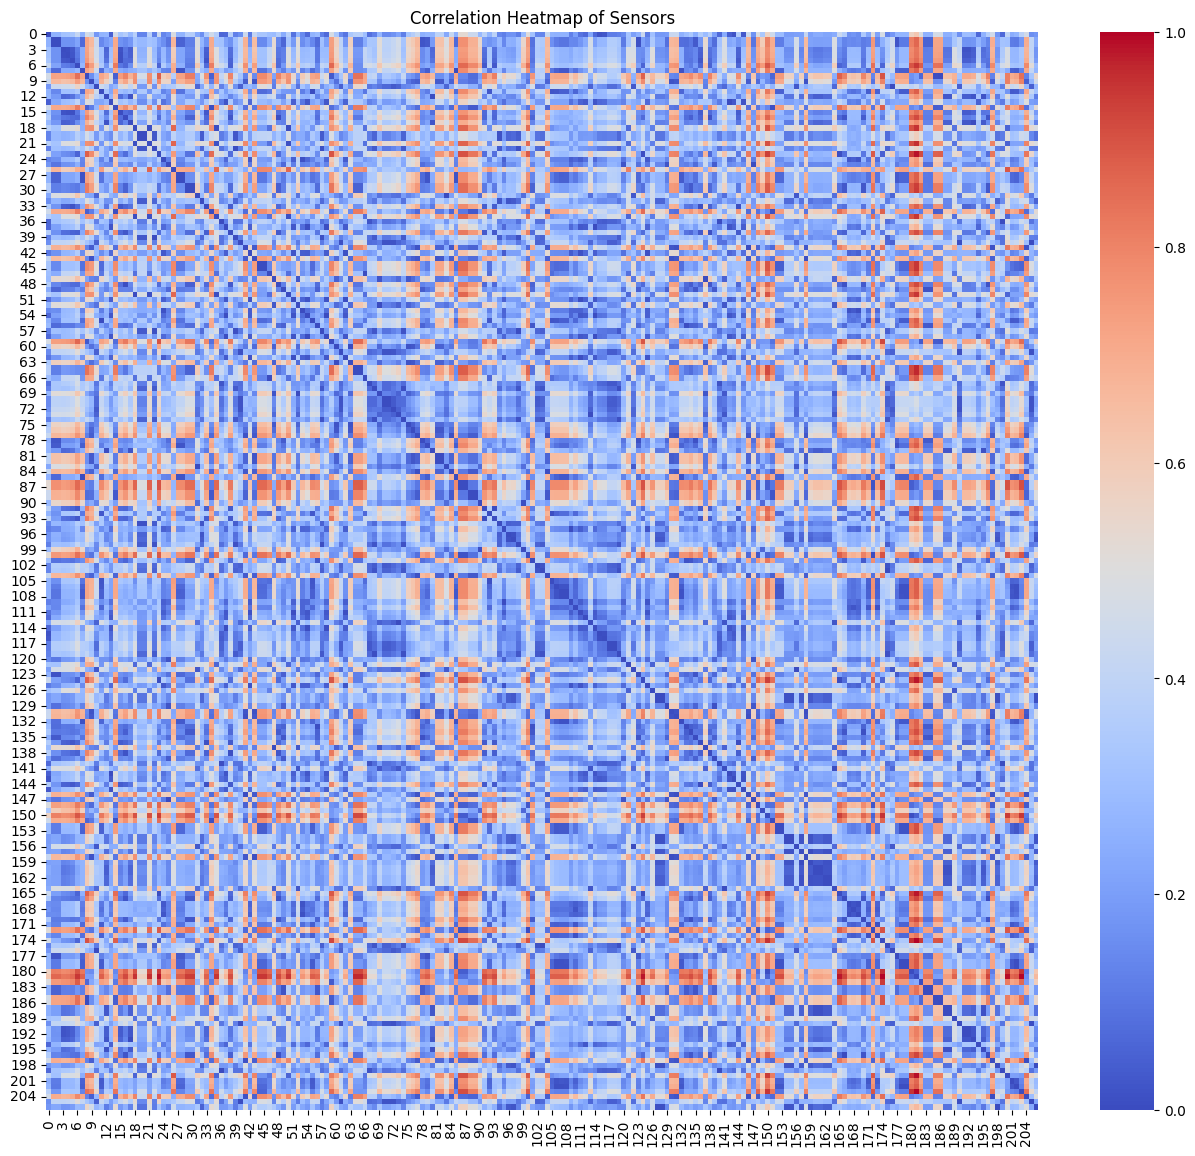

In [20]:
# 総合距離行列の計算
D = calculate_combined_distance_matrix(D_s, D_t, alpha=1.0, beta=0.0)

# センサー毎の相関行列を計算
correlation_matrix = D / D.max()

# ヒートマップを描画
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Sensors')
plt.show()

/tmp/ipykernel_119398/2707634126.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(indexes))


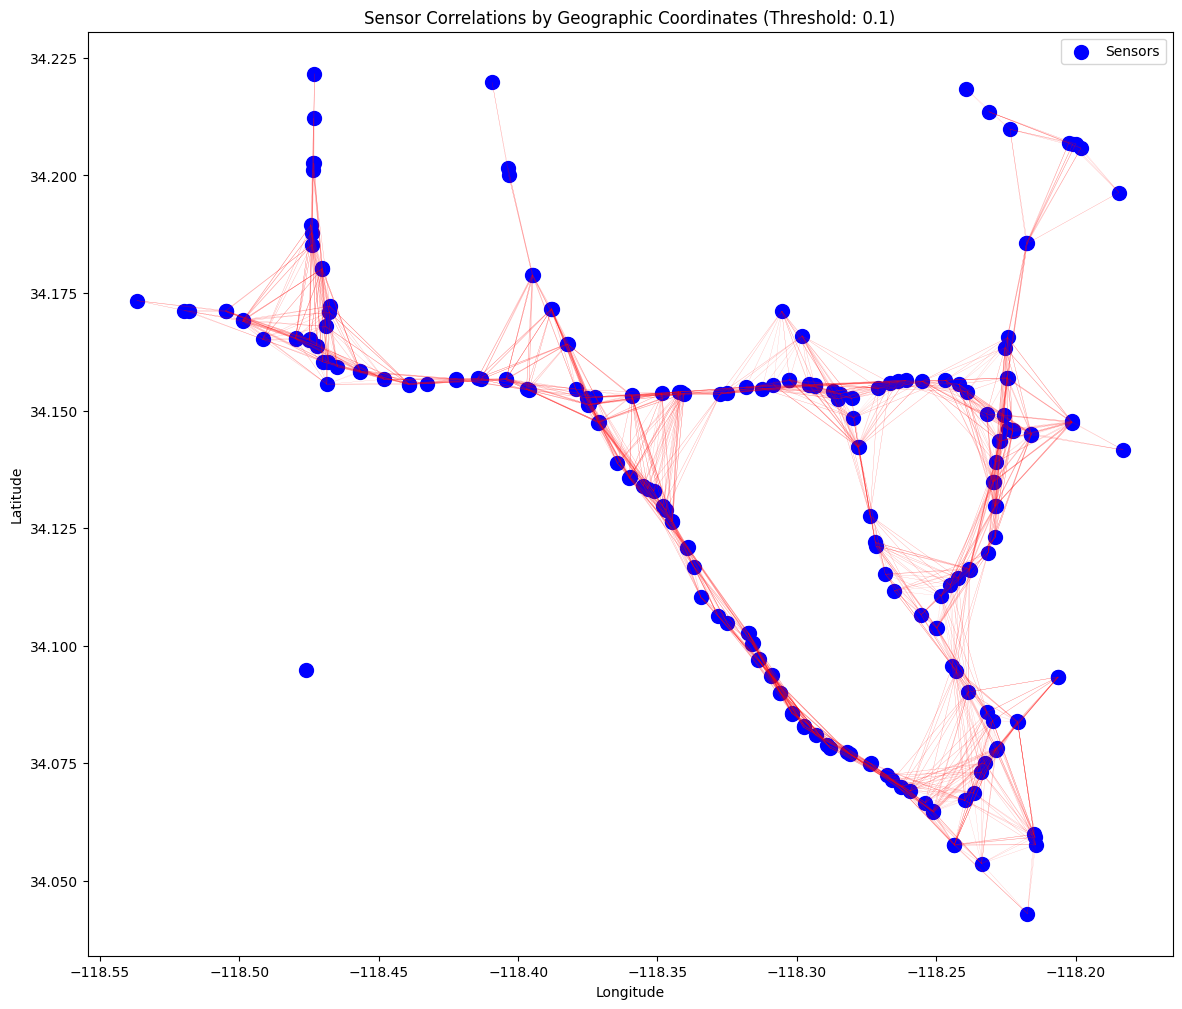

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# センサーの時系列データ (例: センサーごとの測定値を含む列が存在する)

# 閾値を設定して、強い相関のみを可視化（例：|0.7|以上の相関を可視化）
threshold = 0.1
strong_correlations = np.abs(correlation_matrix) < threshold

# 各センサーに対して一意の色を割り当てる
colors = plt.cm.get_cmap('hsv', len(indexes))

# プロットの準備
plt.figure(figsize=(14, 12))

# センサーの位置をプロット
plt.scatter(longitudes, latitudes, s=100, c='blue', label='Sensors')

# 相関が強いセンサー間に線を描画
for i in range(len(indexes)):
    for j in range(i+1, len(indexes)):
        if strong_correlations[i, j]:
            x_coords = [longitudes.iloc[i], longitudes.iloc[j]]
            y_coords = [latitudes.iloc[i], latitudes.iloc[j]]
            plt.plot(x_coords, y_coords, 'r-', alpha=0.5, lw=2 * correlation_matrix[i, j])

plt.title(f'Sensor Correlations by Geographic Coordinates (Threshold: {threshold})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [22]:
from skfuzzy.cluster import cmeans

def fuzzy_c_means_clustering(D, n_clusters):
    """
    総合距離行列 D とクラスタ数 n_clusters を受け取り、FCM によるクラスタリングを行う。
    """
    # Dを2次元データに変換する（行列をベクトル化）
    data = D.reshape((-1, 1))
    
    # FCM クラスタリング
    cntr, u, u0, d, jm, p, fpc = cmeans(
        data.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
    )
    
    # 各データポイントのクラスタ所属度を計算
    labels = np.argmax(u, axis=0)
    
    return labels, u

In [23]:
D.shape[1]

207

In [24]:
# FCM によるクラスタリング
n_clusters = 10  # クラスタ数を設定
labels, membership = fuzzy_c_means_clustering(D, n_clusters)

print("クラスタの割り当て:", labels)
print("クラスタ所属度行列:\n", membership)

クラスタの割り当て: [0 5 5 ... 8 1 0]
クラスタ所属度行列:
 [[8.01296325e-01 1.04602704e-03 1.30351666e-03 ... 1.01761083e-04
  1.46982606e-02 8.01296325e-01]
 [3.98001719e-02 1.26265643e-02 1.60367787e-02 ... 2.30922728e-04
  5.16386899e-01 3.98001719e-02]
 [3.16312140e-03 2.49769314e-04 3.07738509e-04 ... 5.30382203e-04
  2.24983237e-03 3.16312140e-03]
 ...
 [9.11272575e-03 2.06954529e-03 2.53215963e-03 ... 2.74951130e-03
  1.47838215e-02 9.11272575e-03]
 [6.31140443e-03 8.69143071e-04 1.06742749e-03 ... 9.92286699e-01
  7.01224286e-03 6.31140443e-03]
 [1.38271723e-02 8.51295330e-03 1.03026580e-02 ... 7.74380155e-04
  4.42378127e-02 1.38271723e-02]]


/tmp/ipykernel_119398/2497171559.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')
/tmp/ipykernel_119398/2497171559.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)
/tmp/ipykernel_119398/2497171559.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(longitudes.iloc[j], latitudes.iloc[j], c=colors(i), label=f'Cluster {i}')


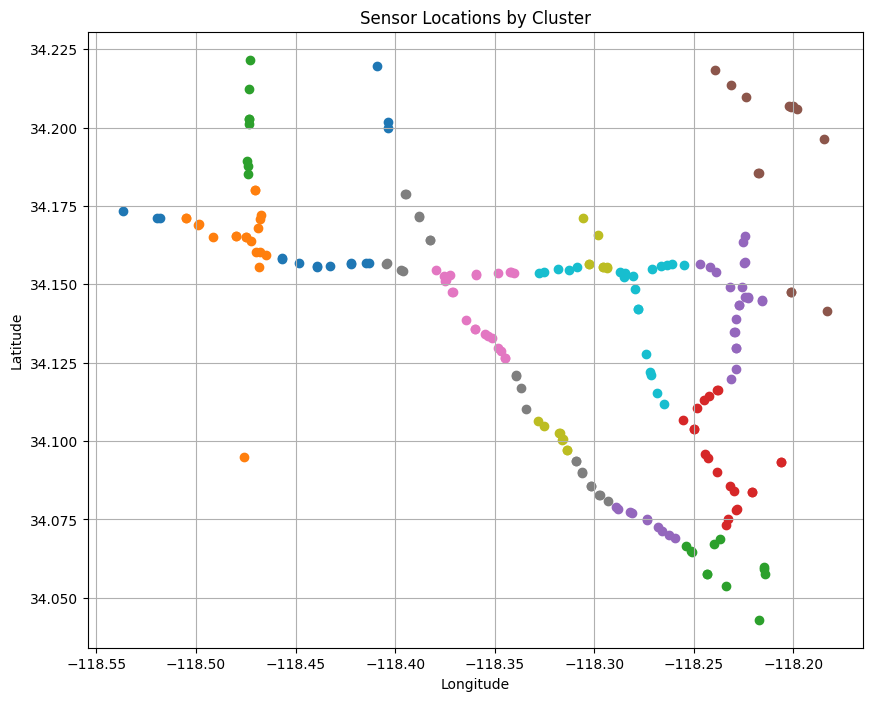

In [32]:
from scipy.cluster.hierarchy import linkage, fcluster

# クラスタリングの実行
# 'ward'法はクラスタ間の分散が最小となるようにクラスタを結合する方法です
Z = linkage(distance_matrix, method='ward')

# クラスタ数を決定 (例: 2クラスタ)
num_clusters = 25
clusters = fcluster(Z, num_clusters, criterion='maxclust')

colors = plt.cm.get_cmap('tab10', num_clusters)

# クラスタごとにセンサーの位置をプロット
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_indices = np.where(clusters == i + 1)[0]
    for j in cluster_indices:
        plt.scatter(longitudes.iloc[j], latitudes.iloc[j], c=colors(i), label=f'Cluster {i}')

plt.title("Sensor Locations by Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [26]:
df

b'773869'  b'767541'  b'767542'  b'717447'  b'717446'  \
1330560000000000000  64.375000  67.625000  67.125000  61.500000  66.875000   
1330560300000000000  62.666667  68.555556  65.444444  62.444444  64.444444   
1330560600000000000  64.000000  63.750000  60.000000  59.000000  66.500000   
1330560900000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1330561200000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
...                        ...        ...        ...        ...        ...   
1340840100000000000  65.000000  65.888889  68.555556  61.666667   0.000000   
1340840400000000000  61.375000  65.625000  66.500000  62.750000   0.000000   
1340840700000000000  67.000000  59.666667  69.555556  61.000000   0.000000   
1340841000000000000  66.750000  62.250000  66.000000  59.625000   0.000000   
1340841300000000000  65.111111  66.888889  66.777778  61.222222   0.000000   

                     b'717445'  b'773062'  b'767620'  b'737529'  b'717816'  \
1330560000000000000  68.750000  65.125000  67.125000  59.625000  62.750000   
1330560300000000000  68.111111  65.000000  65.000000  57.444444  63.333333   
1330560600000000000  66.250000  64.500000  64.250000  63.875000  65.375000   
1330560900000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1330561200000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
...                        ...        ...        ...        ...        ...   
1340840100000000000  54.555556  62.444444  63.333333  59.222222  65.333333   
1340840400000000000  50.500000  62.000000  67.000000  65.250000  67.125000   
1340840700000000000  44.777778  64.222222  63.777778  59.777778  57.666667   
1340841000000000000  53.000000  64.285714  64.125000  60.875000  66.250000   
1340841300000000000  49.555556  65.777778  65.111111  63.000000  61.666667   

                     ...  b'772167'  b'769372'  b'774204'  b'769806'  \
1330560000000000000  ...  45.625000  65.500000  64.500000  66.428571   
1330560300000000000  ...  50.666667  69.875000  66.666667  58.555556   
1330560600000000000  ...  44.125000  69.000000  56.500000  59.250000   
1330560900000000000  ...   0.000000   0.000000   0.000000   0.000000   
1330561200000000000  ...   0.000000   0.000000   0.000000   0.000000   
...                  ...        ...        ...        ...        ...   
1340840100000000000  ...  52.888889  69.000000  65.111111  55.666667   
1340840400000000000  ...  54.000000  69.250000  60.125000  60.500000   
1340840700000000000  ...  51.333333  67.888889  64.333333  57.000000   
1340841000000000000  ...  51.125000  69.375000  61.625000  60.500000   
1340841300000000000  ...  56.000000  67.444444  64.888889  60.888889   

                     b'717590'  b'717592'  b'717595'  b'772168'  b'718141'  \
1330560000000000000  66.875000  59.375000  69.000000  59.250000  69.000000   
1330560300000000000  62.000000  61.111111  64.444444  55.888889  68.444444   
1330560600000000000  68.125000  62.500000  65.625000  61.375000  69.857143   
1330560900000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1330561200000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
...                        ...        ...        ...        ...        ...   
1340840100000000000  66.333333  62.444444  66.777778  64.888889  69.666667   
1340840400000000000  67.250000  59.375000  66.000000  61.250000  69.000000   
1340840700000000000  66.000000  62.666667  68.666667  63.333333  67.444444   
1340841000000000000  65.625000  66.375000  69.500000  63.000000  67.875000   
1340841300000000000  64.222222  66.444444  68.444444  63.555556  68.666667   

                     b'769373'  
1330560000000000000  61.875000  
1330560300000000000  62.875000  
1330560600000000000  62.000000  
1330560900000000000   0.000000  
1330561200000000000   0.000000  
...                        ...  
1340840100000000000  62.333333  
1340840400000000000  62.000000  
1340840700000000000  61.222222  
134084100000000

/tmp/ipykernel_119398/48944595.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(indexes))
/tmp/ipykernel_119398/48944595.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(longitudes.iloc[i], latitudes.iloc[i], c=colors(i), label=f'Index {i}')


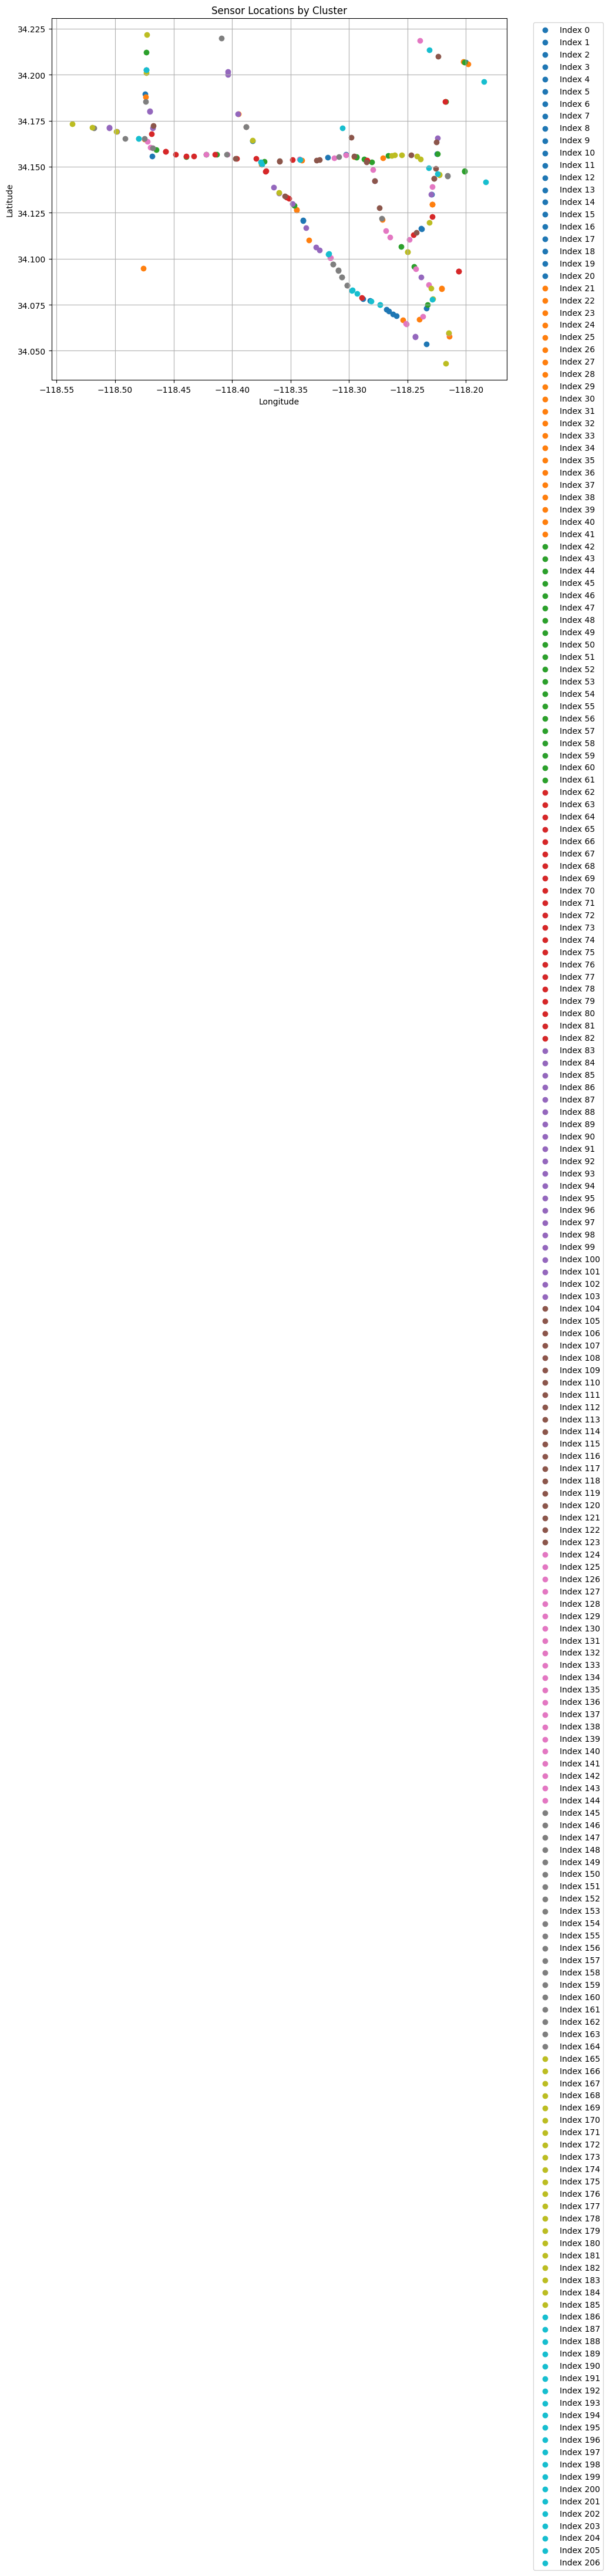

In [35]:
colors = plt.cm.get_cmap('tab10', len(indexes))

# クラスタごとにセンサーの位置をプロット
plt.figure(figsize=(10, 8))
for i in range(len(indexes)):
    plt.scatter(longitudes.iloc[i], latitudes.iloc[i], c=colors(i), label=f'Index {i}')

plt.title("Sensor Locations by Cluster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()